In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool1D, MaxPooling2D, Dense, Flatten, Dropout

import itertools


In [2]:
global_data = {}
length_values = 60
# key : value
# uniq_id : [60 values, label]

In [3]:
def plot_image(data) :
    plt.plot(data.index,data.TBS_1.cumsum(),'bo', color='blue')
    plt.plot(data.index,data.TBS_1.cumsum(), color='blue')  
    
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    
    plt.plot(data.index,data.TBS_2.cumsum(),'bo', color='orange')
    plt.plot(data.index,data.TBS_2.cumsum(), color='orange')  

def reformat_data(filename, global_data) :
    
    data = pd.read_csv(filename)
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    #data.drop(columns={})
    data.set_index(pd.to_datetime(data.Time), inplace=True)
    
    id_acquis = data.id_acquisition.iloc[0]
    
    for val in tqdm(data.connection_id.unique()):
        current_data = data[data.connection_id==val]
        label = current_data.label.value_counts(sort = True, ascending =False).index[0]

        global_data[f"{id_acquis}_{val}"]=(current_data.index, current_data.TBS_2,label)


    return global_data
        
     

In [4]:
directory_data = "../Mesures/"
datasets = [i for i in os.listdir(directory_data) if i.endswith(".csv") ]
datasets

for i, data in enumerate(datasets) :
    file = os.path.join(directory_data,data)
    print(f"Extracting {file}.... {i+1}/{len(datasets)}")
    global_data = reformat_data(file, global_data)

Extracting ./Mesures/messenger20221117_125310.csv.... 1/38


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 90.36it/s]


Extracting ./Mesures/messenger20221124_143112.csv.... 2/38


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 35.81it/s]


Extracting ./Mesures/messenger20221124_151137.csv.... 3/38


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.80it/s]


Extracting ./Mesures/messenger20221125_130559.csv.... 4/38


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 86.67it/s]


Extracting ./Mesures/messenger20221125_150706.csv.... 5/38


100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:03<00:00, 90.74it/s]


Extracting ./Mesures/messenger20221129_131204.csv.... 6/38


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 11.25it/s]


Extracting ./Mesures/messenger20221129_151124.csv.... 7/38


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.76it/s]


Extracting ./Mesures/pure_noise20230106_132210.csv.... 8/38


100%|███████████████████████████████████████████████████████████████████████████████| 839/839 [00:01<00:00, 657.88it/s]


Extracting ./Mesures/skype20221129_164105.csv.... 9/38


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.44it/s]


Extracting ./Mesures/skype20221206_125510.csv.... 10/38


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 36.88it/s]


Extracting ./Mesures/skype20221206_150902.csv.... 11/38


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.68it/s]


Extracting ./Mesures/skype20221208_104403.csv.... 12/38


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]


Extracting ./Mesures/skype20221208_124925.csv.... 13/38


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.31it/s]


Extracting ./Mesures/skype20221215_151512.csv.... 14/38


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 30.06it/s]


Extracting ./Mesures/skype20221215_155618.csv.... 15/38


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 27.89it/s]


Extracting ./Mesures/skype20221215_164208.csv.... 16/38


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.22it/s]


Extracting ./Mesures/skype20221215_174819.csv.... 17/38


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.46it/s]


Extracting ./Mesures/twitch20221117_113554.csv.... 18/38


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 100.35it/s]


Extracting ./Mesures/twitch20221118_075454.csv.... 19/38


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 50.63it/s]


Extracting ./Mesures/twitch20221124_163054.csv.... 20/38


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 20.58it/s]


Extracting ./Mesures/twitch20221125_133859.csv.... 21/38


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:01<00:00, 77.59it/s]


Extracting ./Mesures/twitch20230110_110215.csv.... 22/38


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 92.05it/s]


Extracting ./Mesures/twitch20230110_120513.csv.... 23/38


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 214.03it/s]


Extracting ./Mesures/twitch20230110_130648.csv.... 24/38


100%|███████████████████████████████████████████████████████████████████████████████| 427/427 [00:00<00:00, 431.74it/s]


Extracting ./Mesures/youtube20221108_165214.csv.... 25/38


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 413.57it/s]


Extracting ./Mesures/youtube20221108_182416.csv.... 26/38


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 200.11it/s]

Extracting ./Mesures/youtube20221118_104205.csv.... 27/38



100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 605.40it/s]


Extracting ./Mesures/youtube20221124_125524.csv.... 28/38


100%|███████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 678.76it/s]


Extracting ./Mesures/youtube20221124_154037.csv.... 29/38


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 707.70it/s]


Extracting ./Mesures/youtube20221130_103723.csv.... 30/38


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 441.75it/s]


Extracting ./Mesures/youtube20230110_145404.csv.... 31/38


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 714.32it/s]


Extracting ./Mesures/youtube20230110_161955.csv.... 32/38


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 714.28it/s]


Extracting ./Mesures/youtube20230112_125508.csv.... 33/38


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 391.30it/s]


Extracting ./Mesures/youtube20230112_151029.csv.... 34/38


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 537.04it/s]


Extracting ./Mesures/youtube20230112_154749.csv.... 35/38


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 421.06it/s]


Extracting ./Mesures/youtube20230112_163634.csv.... 36/38


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 492.42it/s]


Extracting ./Mesures/youtube20230117_095221.csv.... 37/38


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 238.91it/s]


Extracting ./Mesures/youtube20230117_121925.csv.... 38/38


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 387.48it/s]


In [5]:
res_n, res_dura, labels = [],[],[]
for key, value in tqdm(global_data.items()) :
    res_n.append(len(value[0]))
    dura = (value[0][-1]-value[0][0]).total_seconds()
    res_dura.append(dura)
    
    labels.append(value[2])
    
df = pd.DataFrame({"Duration(s)" : res_dura, "Duration(measures)" : res_n, "label" : labels})   
df

100%|███████████████████████████████████████████████████████████████████████████| 3456/3456 [00:00<00:00, 26780.96it/s]


,Duration(s),Duration(measures),label
0,2777.818,364319,messenger
1,0.077,11,messenger
2,0.077,11,messenger
3,9.331,1230,messenger
4,9.427,1229,messenger
...,...,...,...
3451,10.171,30,youtube
3452,21.255,563,youtube
3453,21.815,541,youtube
3454,107.245,2991,youtube


In [6]:
df.label.value_counts()

youtube       1257
noise         1061
pure_noise     839
twitch         149
messenger       96
skype           54
Name: label, dtype: int64

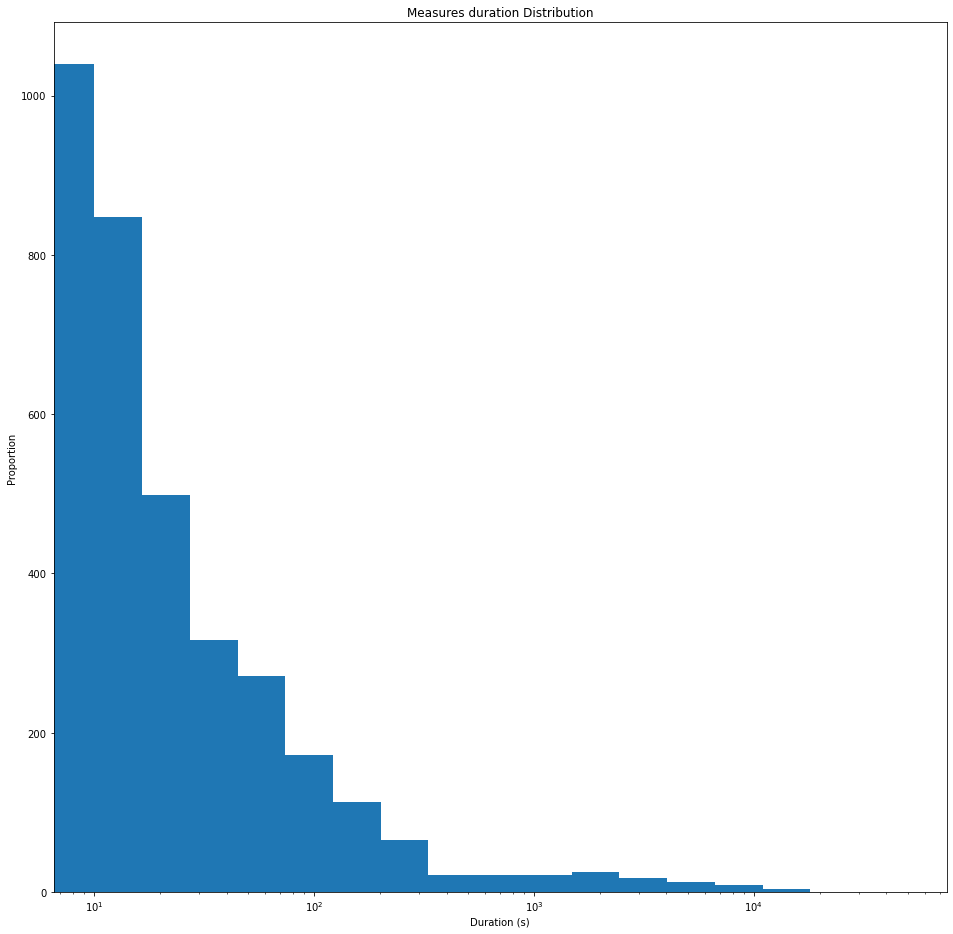

In [7]:

def plot_histo(data) : 
    data = data["Duration(s)"]
    bins = 10*np.exp(np.arange(0,9,0.5))
    bins = np.insert(bins, 0, 0)
    fig, ax = plt.subplots(figsize=(16,16))
    plt.hist(data.values, bins=bins)
    ax.set_xscale('log')
    ax.set_xlabel("Duration (s)")
    ax.set_ylabel("Proportion")
    ax.set_title("Measures duration Distribution")
plot_histo(df)

In [8]:
uni_label = ["noise",
"youtube",
"messenger" ,
"twitch" ,
"skype"  ]

C:\Users\Malo\AppData\Local\Temp\ipykernel_7488\3335659691.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(vals)


(5,)


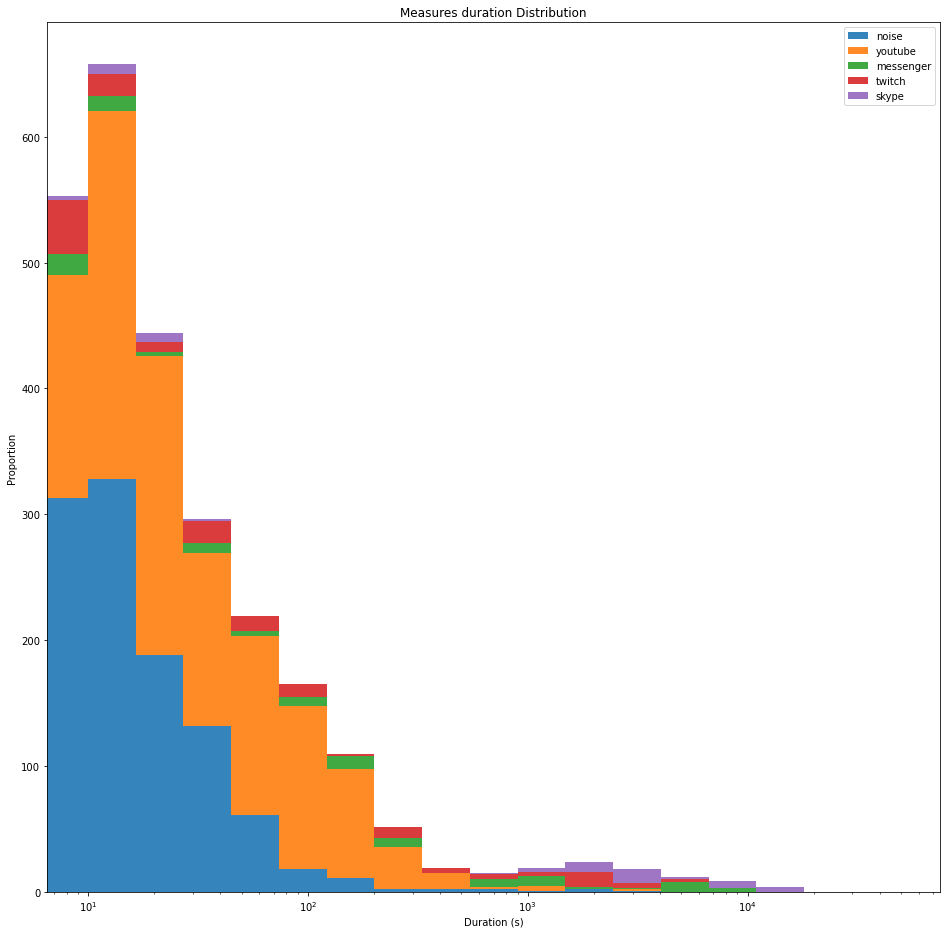

In [9]:

def plot_histo(data) : 
    bins = 10*np.exp(np.arange(0,9,0.5))
    bins = np.insert(bins, 0, 0)
    fig, ax = plt.subplots(figsize=(16,16))
    
    vals = []
    for lab in uni_label :
        current_data = data[data["label"]==lab]["Duration(s)"]
        vals.append(current_data.values)
    new_data = np.array(vals)
    print(new_data.shape)
    plt.hist(new_data,stacked=True, bins=bins, alpha = 0.9)
    
    ax.set_xscale('log')
    ax.set_xlabel("Duration (s)")
    ax.set_ylabel("Proportion")
    ax.set_title("Measures duration Distribution")
    ax.legend(uni_label)
plot_histo(df)